# Regression Trees

#### **Overview**

Regression trees are a type of **decision tree algorithm** used for predicting continuous target variables. The model recursively partitions the feature space into regions by selecting splits that minimize prediction error, producing a piecewise constant approximation of the target function.

This notebook demonstrates the use of a **custom regression tree implementation** on a continuous-output dataset. The example highlights how **recursive splitting, tree depth, and stopping criteria** affect model complexity and generalization.

The goals of this notebook are to:
 - Understand how regression trees partition feature space
 - Explore the trade-off between model complexity and overfitting
 - Implement a regression tree from scratch
 - Evaluate predictive accuracy of the regression tree

In [10]:
import sys
import os
from pathlib import Path

# 1. Add the project root's 'src' directory to the Python path
current_dir = os.getcwd()
project_root = os.path.abspath(os.path.join(current_dir, os.pardir, os.pardir, os.pardir))
src_path = os.path.join(project_root, 'src')

if src_path not in sys.path:
    sys.path.append(src_path)
    print(f"Added project source directory to sys.path: {src_path}")

In [11]:
# load in necessary python packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import (mean_squared_error, mean_absolute_error, 
                             r2_score, accuracy_score)
from sklearn.tree import plot_tree
from matplotlib.colors import ListedColormap

# NOTE: Must import Path here for use in the next cell
from pathlib import Path

# load in the functions created in src folder
from rice_ml.processing.preprocessing import (load_and_prepare_data,
                                              build_preprocessor)
from rice_ml.supervised_learning.regression_trees import (train_regression_tree,
                                                          evaluate_regression_tree,
                                                          plot_regression_tree,
                                                          plot_feature_importance,
                                                          plot_true_vs_predicted,
                                                          plot_tree_splits_2d)


In [12]:
# Ensure data is loaded appropriately

# set path to find dataset
repo_root = Path("/Users/doriolson/Desktop/repos/CMOR_438_Final_Repository")
data_path = Path("../../../Data/adult.csv")

# load data
df = load_and_prepare_data(data_path)

/Users/ruchitiwari/Desktop/Final CMOR 438/CMOR_438_Final_Repository/src/rice_ml/processing/preprocessing.py:606: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


Next, we train the regression tree model.

In [13]:
model, X_test, y_test = train_regression_tree(df)

After the model has been trained and created, we can evaluate its accuracy and efficiency. We can see that the model produces an R-squared score of 0.44, which means that there is a mildly strong positive correlation between adult income and the prediction variables. The mean squared error for the model is 0.1, which is relatively good (as lower to 0 is preferred). Also notably, the classification accuracy of the model is 0.86, which is pretty decent.

In [14]:
evaluate_regression_tree(model, X_test, y_test)

Mean Squared Error: 0.10194483979131315
Mean Absolute Error: 0.20399144898322608
R² Score: 0.440018475196124
Classification Accuracy: 0.8559729757395844


# Visualizations

A regression tree is – by nature of being a prediction tree algorithm – a type of model that uses a lot of useful visuals to help understand the data. This first graph is a picture of the top five levels of the tree created by this algorithm. This is the most important part of the regression tree algorithm! You can see the binary choices the model created to determine how to categorize the data and its resulting off shoot choices. 

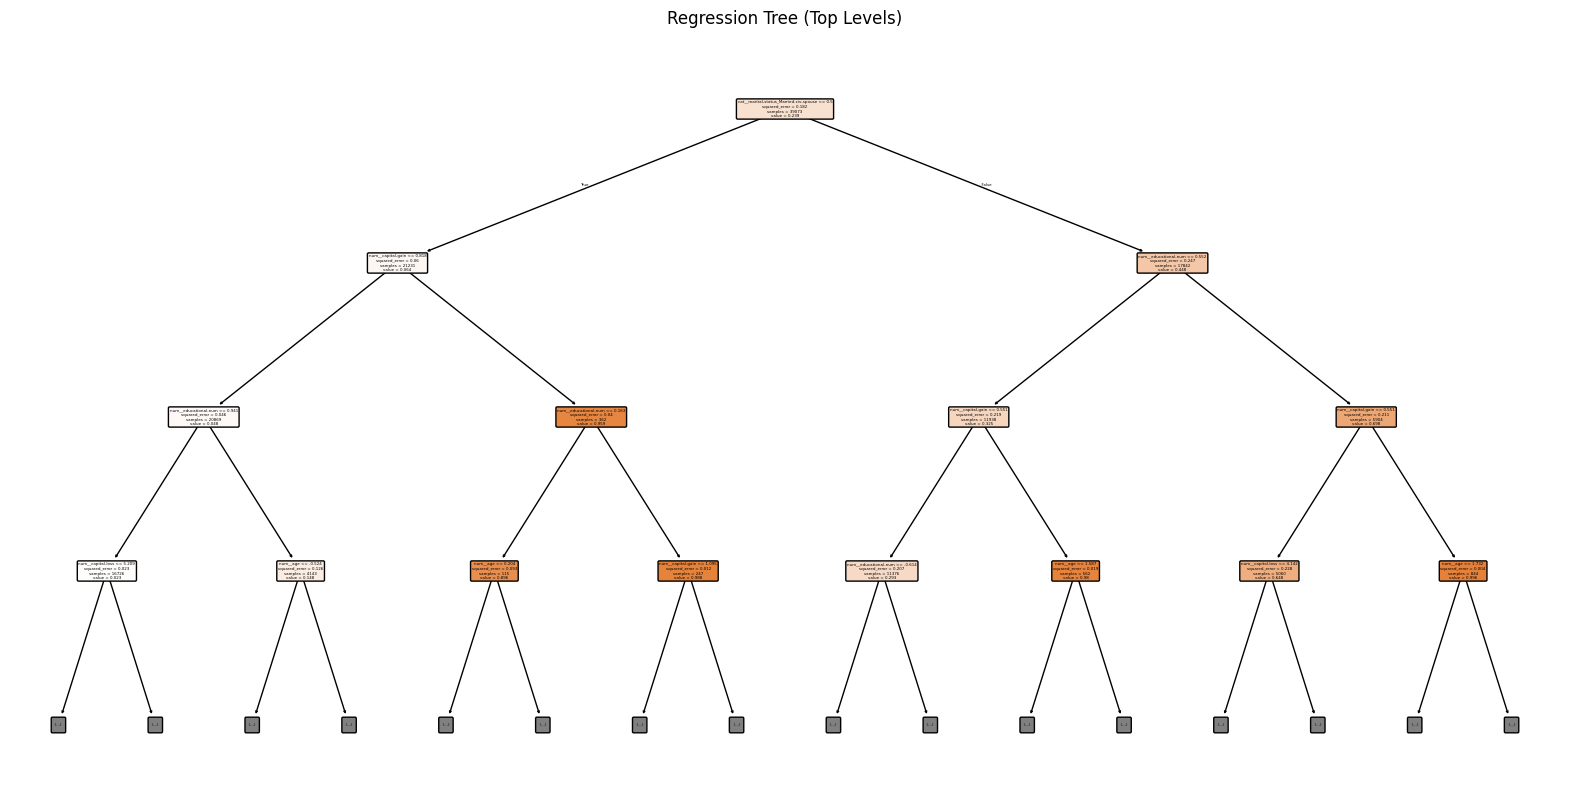

In [6]:
plot_regression_tree(model, max_depth=3)

The next graph is a feature importance chart, which shows which outcomes of certain other variables have an impact on predicted a person's income status. Specifically, this graph shows which features reduce variance in the model the most.

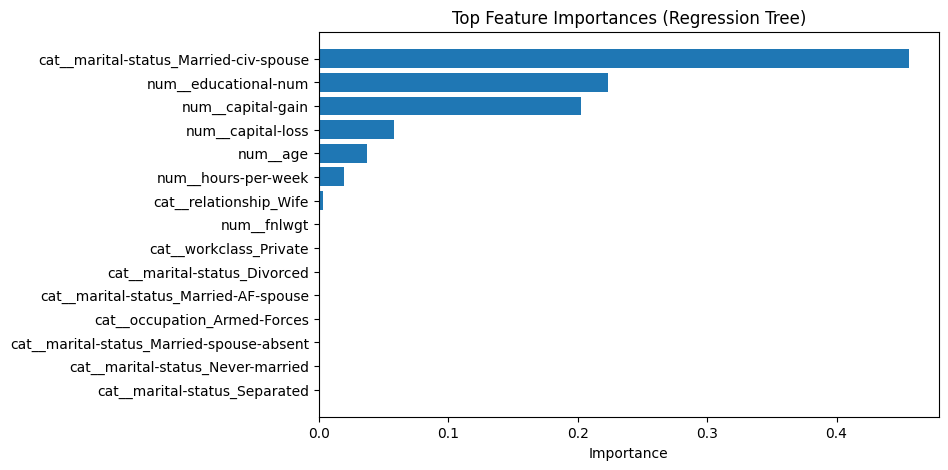

In [7]:
plot_feature_importance(model, top_n=15)

The next visual shows a scatterplot of the true values of the income variable compared to the values predicted by the regression tree. We can see that the tree predicted values outside of just the binary choices of 0 or 1, but the majority of the predictions centered around those two values. Additionally, the algorithm was overall realtively accurate, since the predicted regression line runs from a true negative to a true positive.

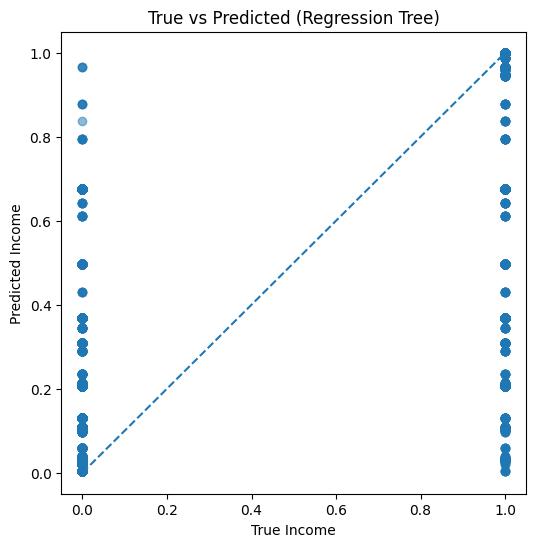

In [8]:
plot_true_vs_predicted(model, X_test, y_test)

Another important aspect of the regression tree is how the model chooses to split the data and make decisions on how they will classify and predict the income variable. This graph chooses to variables (age and hours worked per week) to try and split the observations into different sections, and from there be able to predict the income of each person more accurately. The chart shows that there are clusters across the chart of age and hours worked that likely become the sections of the regression tree. 

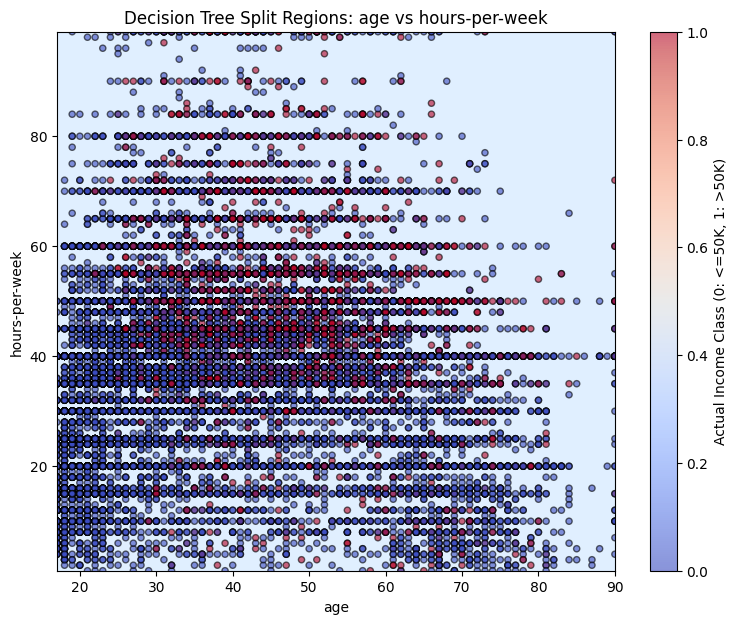

In [9]:
plot_tree_splits_2d(
    pipeline=model,
    df=df,
    feature_x="age",
    feature_y="hours-per-week"
)